In [1]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import sklearn.model_selection as model_selection

In [2]:
#multi = pd.read_csv('inputMM_Means.csv')
#df = pd.read_csv('inputS_Means.csv')

#multi = pd.read_csv('inputMM_PF.csv')
#df = pd.read_csv('inputS_PF.csv')

multi = pd.read_csv('inputMM_Max.csv')
df = pd.read_csv('inputS_Max.csv')


In [3]:
#Prepare the input vectors and the output values
X = df.drop(['target'], axis=1)
y = df['target']

X_multi = df.drop(['target'], axis = 1)
y_multi = df['target']

#Split both dataset into training set and test set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 101)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = model_selection.train_test_split(X_multi, y_multi, train_size = 0.80, test_size = 0.20, random_state = 101)

#preprocessing single 
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
encoder.fit(y_test)
y_test = encoder.transform(y_test)
#multi
encoder.fit(y_multi_train)
y_multi_train = encoder.transform(y_multi_train)
encoder.fit(y_multi_test)
y_multi_test = encoder.transform(y_multi_test)

In [4]:
model = AdaBoostClassifier()
# Il modello debole usato di default è un decisionTreeClassifier con profindità massima 1

In [5]:
score = []
for n in range(1, 100):
    model = AdaBoostClassifier(n_estimators= n)
    # Il modello debole usato di default è un decisionTreeClassifier con profindità massima 1
    cv = RepeatedStratifiedKFold(n_splits =5, n_repeats=1, random_state=1)
    n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv =cv, n_jobs=1, error_score='raise')
    mean((n_scores)), std(n_scores)
    score.append(mean((n_scores)))

Text(0.5, 1.0, 'AdaBoost - Feature: Max frequency component')

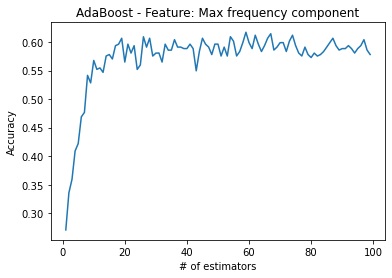

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1,100), score)
plt.xlabel("# of estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost - Feature: Max frequency component")